# Stefan-Maxwell diffusion involving three components


This example demonstrates the modeling of the multicomponent Stefan-Maxwell model involving three componentt.
First we import the Stefan-Maxwell diffusion module

In [1]:
import numpy as np
from diffusionpy import Diffusion_MS
import matplotlib.pyplot as plt

The experimental data for this example was taken from Schabel 2006 (https://doi.org/10.1016/j.ces.2006.12.062)

In [2]:
texp=np.asarray([0,4.427792916,14.50035208,23.87257753,33.76909653,45.58674953,58.69408811,71.80142669,91.44521324,120.9089796,147.0930411,177.8656278,212.5493678,264.9136638,429.8518201])

wpvac=np.asarray([0.333333333,0.397028757,0.559683846,0.704648614,0.763915741,0.791401827,0.801167219,0.822653035,0.830878575,0.841458325,0.846286716,0.857199094,0.851138308,0.858388537,0.8723936549])

wtol=np.asarray([0.333333333,0.361083897,0.34858624,0.273123698,0.22781745,0.202716913,0.188759833,0.17692216,0.169121425,0.158541675,0.153713284,0.142800906,0.143816828,0.137082518,0.123003508])

wmet=np.asarray([0.333333333,0.241887346,0.091729914,0.022227687,0.008266808,0.00588126,0.010072947,0.000424805,0,0,0,0,0,0,0])

We want to describe the diffusion of water into an ASD film. The ASD-water mixture is a ternary system. First we define starting and equilibrium weight fractions.

In [3]:
nc=3
L=0.001
wi0=np.asarray([0.01,0.495,0.495])
wi8=np.asarray([0.999,0.0005,0.0005])
Mi=np.asarray([18.015,357.57,65000])

For a the diffusion of three components, three binary diffusion coefficients need to be defined


$\hat{Ð} =$ 
$\left[\begin{array}{rrr} 
0 & Ð_{12} & Ð_{13} \\ 
0 & 0 & Ð_{23} \\ 
0 & 0 & 0 \\ 
\end{array}\right]$

$Ð_{vec} = \left[\begin{array}{rrr} Ð_{12} & Ð_{13} & Ð_{23} \end{array}\right]$

In [4]:
Dvec=np.asarray([1E-10,2.3E-10,1.7E-13])

Next we define the time array and which component is mobile

In [5]:
nt=300
t=np.linspace(0,texp[-1],nt)*60
volatile=np.asarray([True,True,False])

In [6]:
wt,wtz,zvec,Lt=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,volatile,full_output=True)

CasADi -  MESSAGE("integrator::init") [.../casadi/core/function_internal.cpp:477]
CasADi -  MESSAGE("integrator::create_function daeF:[x, z, p, t]->[ode, alg]") [.../casadi/core/oracle_function.cpp:132]
CasADi -  MESSAGE("integrator::create_function quadF:[x, z, p, t]->[quad]") [.../casadi/core/oracle_function.cpp:132]
CasADi -  MESSAGE("integrator::create_function daeB:[rx, rz, rp, x, z, p, t]->[rode, ralg]") [.../casadi/core/oracle_function.cpp:132]
CasADi -  MESSAGE("integrator::create_function quadB:[rx, rz, rp, x, z, p, t]->[rquad]") [.../casadi/core/oracle_function.cpp:132]
CasADi -  MESSAGE("IDA initialized") [.../casadi/interfaces/sundials/idas_interface.cpp:290]
CasADi -  MESSAGE("Attached linear solver") [.../casadi/interfaces/sundials/idas_interface.cpp:384]
CasADi -  MESSAGE("Initialized adjoint sensitivities") [.../casadi/interfaces/sundials/idas_interface.cpp:392]
CasADi -  MESSAGE("integrator::reset") [.../casadi/interfaces/sundials/idas_interface.cpp:406]
------------- 

We can determine the mass dissolved in the dissolution medium by quantifying the mass that leaves the ASD. The initial mass of the ASD and the mass of the dissolution medium must be known

[-5.85329101e-05 -5.85350041e-05 -5.85376576e-05 -5.85405067e-05
 -5.85434675e-05 -5.85464978e-05 -5.85495720e-05 -5.85526725e-05
 -5.85557867e-05 -5.85589050e-05 -5.85620198e-05 -5.85651249e-05
 -5.85682155e-05 -5.85712873e-05 -5.85743368e-05 -5.85773609e-05
 -5.85803571e-05 -5.85833231e-05 -5.85862570e-05 -5.85891570e-05
 -5.85920217e-05 -5.85948497e-05 -5.85976400e-05 -5.86003916e-05
 -5.86031037e-05 -5.86057756e-05 -5.86084069e-05 -5.86109970e-05
 -5.86135457e-05 -5.86160527e-05 -5.86185181e-05 -5.86209416e-05
 -5.86233234e-05 -5.86256636e-05 -5.86279625e-05 -5.86302202e-05
 -5.86324372e-05 -5.86346137e-05 -5.86367503e-05 -5.86388473e-05
 -5.86409053e-05 -5.86429248e-05 -5.86449065e-05 -5.86468509e-05
 -5.86487585e-05 -5.86506302e-05 -5.86524665e-05 -5.86542681e-05
 -5.86560357e-05 -5.86577700e-05 -5.86594716e-05 -5.86611414e-05
 -5.86627800e-05 -5.86643881e-05 -5.86659664e-05 -5.86675156e-05
 -5.86690365e-05 -5.86705297e-05 -5.86719959e-05 -5.86734358e-05
 -5.86748501e-05 -5.86762

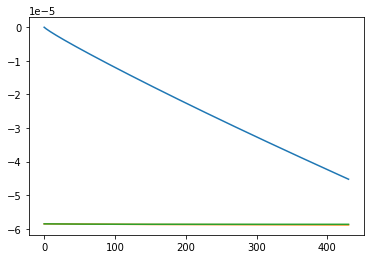

In [7]:
d=0.008 # 8 mm
A=np.pi/4*d**2
rho=1200
mASD=L*A*rho #

mw=mASD*wi0[0]
mAPI=mASD*wi0[1]
mPol=mASD*wi0[2]

mASDt=Lt*A*rho

mwt=mASDt*wt[:,0]
mAPIt=mASDt*wt[:,1]
mPolt=mASDt*wt[:,2]

mAPIDiss=mAPI-mAPIt
mwDiss=mw-mwt
mPolDiss=mPol-mPolt

mdiss=0.5 # 500 g Wasser

wAPIDiss=mAPIDiss/mdiss
wPolDiss=mPolDiss/mdiss
wwDiss=mwDiss/mdiss
print(wAPIDiss)
plt.plot(t/60,wwDiss)
plt.plot(t/60,wAPIDiss)
plt.plot(t/60,wPolDiss)
# plt.plot(t/60,mASDt/mASD)


We plot the results

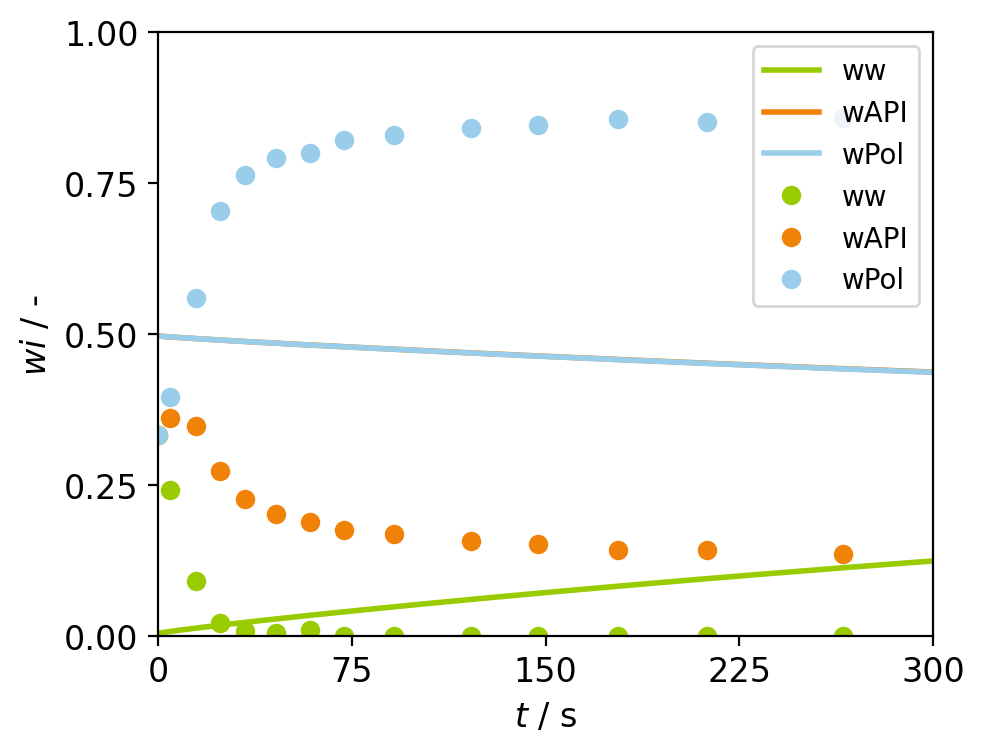

In [8]:

font = {'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)

color1 = "#99CC00"
color2 = "#F08208"
color3 = "#99CDE9"

fig, ax = plt.subplots(figsize=(5, 4), dpi = 200)
fig.subplots_adjust(hspace=0.5, wspace=0.3)


ax.plot(t/60,wt[:,0], "-",color = color1 , 
        linewidth = 2.0, label = "ww")
ax.plot(t/60,wt[:,1], "-",color = color2 , 
        linewidth = 2.0, label = "wAPI")
ax.plot(t/60,wt[:,2], "-",color = color3 , 
        linewidth = 2.0, label = "wPol")

ax.plot(texp,wmet, "o",color = color1 , 
        linewidth = 2.0, label = "ww")
ax.plot(texp,wtol, "o",color = color2 , 
        linewidth = 2.0, label = "wAPI")
ax.plot(texp,wpvac, "o",color = color3 , 
        linewidth = 2.0, label = "wPol")


ax.legend(fontsize="small")
ax.set_xlabel('$t$ / s')
ax.set_ylabel('$wi$ / -')
ax.axis([0, 300., 0., 1.])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))
plt.show()